In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline

In [62]:
X,y = make_blobs(n_samples=1000, centers = 3, n_features= 2)

In [63]:
X

array([[-4.59980707, -6.10826706],
       [ 6.62154385,  3.49771552],
       [-5.18550033, -6.30474222],
       ...,
       [ 5.0793139 ,  4.81088715],
       [ 4.0123159 ,  3.81814455],
       [-3.92686695, -5.03969444]], shape=(1000, 2))

In [64]:
y

array([1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1,
       1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0,
       1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2,

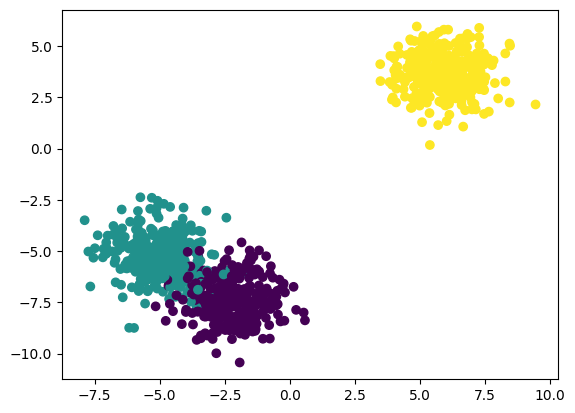

In [65]:
plt.scatter(X[:,0],X[:,1],c=y)

In [66]:
## standardization --- feature scalling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size= 0.33,random_state=42) 

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.cluster import KMeans

In [71]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: Runtim

In [72]:
wcss

[1340.0000000000007,
 115.74107242605976,
 53.87096237607568,
 47.75313645878801,
 40.56085347555102,
 35.99223068756065,
 34.7765387476491,
 29.03722591728848,
 24.98781786748021,
 22.62041352189585]

Text(0, 0.5, 'wcss')

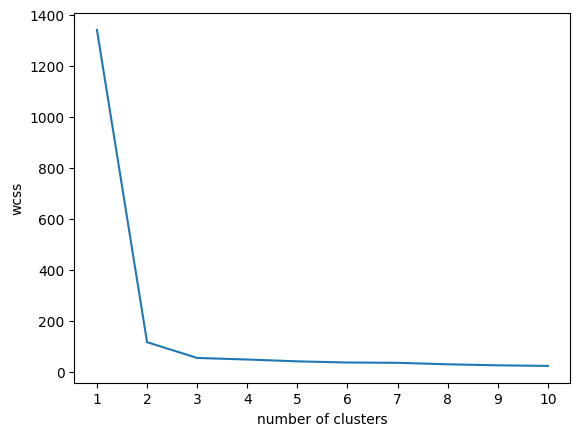

In [73]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel('wcss')

In [74]:
kmeans.fit_predict(X_train_scaled)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/ml_global/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([9, 6, 2, 9, 7, 8, 0, 6, 4, 2, 3, 7, 4, 6, 8, 9, 2, 3, 5, 1, 7, 6,
       2, 9, 6, 3, 9, 5, 1, 1, 1, 9, 8, 3, 5, 0, 0, 9, 0, 1, 2, 3, 3, 3,
       9, 4, 4, 4, 7, 2, 1, 3, 3, 7, 1, 0, 2, 3, 0, 1, 7, 7, 3, 2, 0, 7,
       9, 7, 9, 4, 8, 4, 3, 2, 8, 2, 2, 7, 4, 1, 8, 8, 4, 0, 0, 3, 4, 5,
       7, 3, 5, 4, 0, 4, 6, 1, 9, 0, 4, 1, 9, 9, 4, 7, 9, 6, 5, 7, 2, 9,
       5, 0, 4, 3, 9, 0, 2, 3, 6, 3, 1, 8, 8, 1, 0, 6, 6, 4, 3, 2, 4, 5,
       2, 2, 1, 9, 1, 9, 2, 4, 4, 8, 9, 3, 2, 2, 4, 0, 3, 2, 2, 9, 5, 1,
       9, 8, 9, 4, 2, 1, 8, 2, 7, 0, 8, 1, 6, 6, 0, 0, 1, 0, 4, 1, 2, 4,
       4, 3, 8, 6, 3, 7, 2, 8, 1, 0, 5, 3, 9, 3, 9, 6, 4, 6, 2, 1, 4, 9,
       2, 6, 8, 3, 9, 1, 4, 4, 7, 9, 4, 3, 1, 9, 7, 8, 7, 9, 3, 2, 5, 2,
       9, 4, 6, 7, 3, 0, 2, 6, 6, 0, 3, 0, 1, 7, 7, 4, 1, 2, 9, 6, 2, 7,
       9, 8, 2, 9, 9, 0, 9, 8, 0, 3, 0, 6, 7, 6, 4, 4, 9, 2, 4, 4, 9, 3,
       2, 6, 0, 3, 2, 1, 2, 1, 2, 6, 3, 4, 6, 7, 6, 1, 9, 0, 6, 9, 9, 0,
       9, 1, 0, 4, 9, 3, 9, 8, 4, 0, 9, 2, 9, 2, 0,

In [75]:
y_pred =kmeans.predict(X_test_scaled)

In [76]:
y_pred

array([1, 3, 4, 6, 9, 6, 3, 6, 2, 1, 7, 0, 2, 8, 2, 2, 2, 2, 1, 3, 9, 1,
       0, 2, 0, 0, 4, 3, 6, 7, 3, 4, 0, 9, 6, 7, 1, 2, 6, 9, 6, 0, 0, 7,
       6, 3, 3, 1, 0, 8, 9, 1, 8, 4, 3, 7, 0, 0, 5, 2, 9, 7, 4, 1, 3, 2,
       2, 2, 9, 0, 2, 2, 6, 0, 2, 6, 0, 8, 4, 3, 2, 7, 3, 2, 3, 3, 4, 5,
       3, 7, 2, 6, 7, 7, 3, 0, 5, 4, 8, 7, 7, 1, 4, 0, 3, 2, 1, 1, 7, 9,
       4, 8, 3, 1, 0, 7, 0, 9, 0, 4, 0, 9, 2, 4, 2, 9, 2, 4, 3, 1, 2, 0,
       0, 9, 1, 9, 1, 5, 8, 9, 4, 7, 7, 8, 4, 3, 8, 7, 1, 0, 5, 2, 2, 9,
       2, 0, 1, 4, 1, 0, 6, 4, 8, 4, 7, 2, 3, 7, 1, 3, 2, 4, 2, 3, 3, 6,
       8, 3, 6, 2, 6, 0, 3, 6, 2, 2, 8, 1, 7, 9, 9, 6, 6, 1, 2, 8, 0, 6,
       0, 0, 8, 3, 7, 7, 2, 0, 1, 6, 7, 2, 3, 4, 3, 4, 1, 9, 9, 4, 3, 2,
       7, 3, 9, 9, 5, 7, 9, 1, 7, 1, 2, 7, 6, 6, 0, 4, 6, 0, 8, 9, 0, 4,
       2, 2, 3, 5, 9, 4, 8, 2, 7, 8, 6, 8, 6, 2, 2, 4, 5, 0, 5, 8, 1, 6,
       0, 3, 2, 3, 9, 3, 4, 2, 9, 6, 0, 1, 8, 8, 4, 2, 2, 9, 7, 4, 1, 1,
       9, 4, 8, 1, 4, 6, 7, 1, 7, 2, 3, 1, 9, 1, 0,

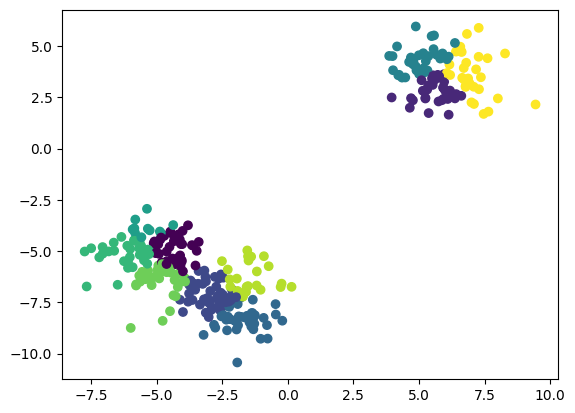

In [77]:
 
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)